#  Case-study on real Time dataset using Artificial Neural Networks 3

We are going to do a case study on case study on real time dataset using Arificial Neural Network(ANN).
The dataset in which we going to do the ANN is related to the sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

acceleration_x

acceleration_y

acceleration_z

gyro_x

gyro_y

gyro_z

There is an activity type represented by "activity" column which acts as label and reflects following activities:

"0": walking:
"1": running:

Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

"0": left wrist:
"1": right wrist:

Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements.

In [18]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [19]:
#Import the dataset
data=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/run-or-walk/runorwalk.csv')
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [20]:
data.shape

(88588, 11)

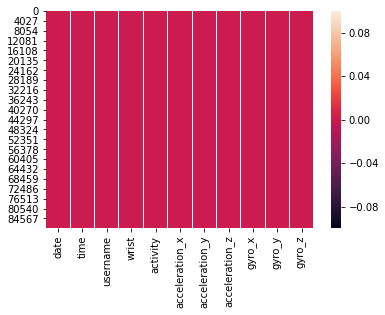

In [21]:
sb.heatmap(data.isnull())

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


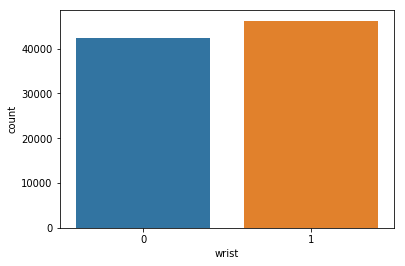

In [23]:
sb.countplot(data['wrist'])

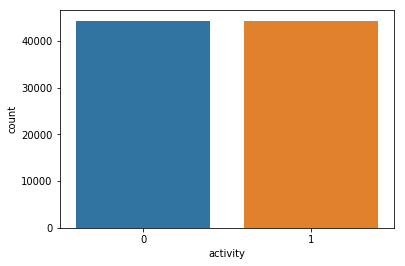

In [24]:
sb.countplot(data['activity'])

According to the data activity is only true for a person when he runs not when he walks

In [25]:
for index, row in data.iterrows():
    A=row['activity']
    if(A==1):
        data.loc[index,'Running'] = 1
    else:
        data.loc[index,'Running'] = 0

In [26]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Running
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.0
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0.0
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0.0
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.0
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0.0
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750,0.0
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473,0.0
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348,0.0
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759,0.0
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982,0.0


In the Running column 0 indicates walking while 1 indicates running.

In [27]:
data.drop('activity',axis=1,inplace=True)

In [28]:
data.drop(['date','time','username'],axis=1,inplace=True)

In [29]:
data

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Running
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.0
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0.0
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0.0
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.0
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0.0
5,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750,0.0
6,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473,0.0
7,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348,0.0
8,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759,0.0
9,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982,0.0


In the Running column 0 indicates walking 1 indicates running

In [30]:
x=data.iloc[:,0:7].values
y=data.iloc[:,7].values

In [31]:
x

array([[ 0.    ,  0.265 , -0.7814, ..., -0.059 ,  0.0325, -2.9296],
       [ 0.    ,  0.6722, -1.1233, ..., -0.1757,  0.0208,  0.1269],
       [ 0.    ,  0.4399, -1.4817, ..., -0.9105,  0.1063, -2.4367],
       ...,
       [ 0.    ,  0.4587, -1.178 , ..., -1.45  , -0.2792, -1.2616],
       [ 0.    ,  0.259 , -0.8582, ..., -1.5165,  0.456 , -1.7755],
       [ 0.    ,  0.314 , -0.8008, ...,  0.1183,  1.085 ,  1.2814]])

In [32]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [35]:
x_test

array([[-1.04823408,  0.25225957, -0.46135096, ..., -0.99592489,
         0.80869872, -0.61147884],
       [ 0.95398539, -2.74771365,  0.23079035, ..., -1.61312784,
         0.93000013, -1.19341063],
       [-1.04823408,  0.54992287, -1.0253292 , ..., -0.98722627,
        -0.5562124 , -0.81522035],
       ...,
       [ 0.95398539, -1.8621728 , -0.18710629, ..., -1.90249659,
        -1.40781651, -1.69959974],
       [ 0.95398539, -1.91252826,  0.92384278, ..., -1.65143369,
        -1.75883404, -0.52150826],
       [-1.04823408, -0.50515793,  0.17445327, ...,  1.40162209,
         0.09718569,  0.2089796 ]])

In [36]:
#import the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [37]:
#Initialising the ANN
classifier=Sequential()
#Adding the input and first hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=7))
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Fitting the ANN to the training set
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
70870/70870 [==============================] - 16s 224us/step - loss: 0.1495 - acc: 0.9479
Epoch 2/100
70870/70870 [==============================] - 13s 177us/step - loss: 0.0866 - acc: 0.9711
Epoch 3/100
70870/70870 [==============================] - 13s 177us/step - loss: 0.0810 - acc: 0.9732
Epoch 4/100
70870/70870 [==============================] - 12s 170us/step - loss: 0.0782 - acc: 0.9733
Epoch 5/100
70870/70870 [==============================] - 12s 174us/step - loss: 0.0774 - acc: 0.9737
Epoch 6/100
70870/70870 [==============================] - 13s 183us/step - loss: 0.0769 - acc: 0.9736
Epoch 7/100
70870/70870 [==============================] - 11s 162us/step - loss: 0.0761 - acc: 0.9742
Epoch 8/100
70870/70870 [==============================] - 11s 152us/step - loss: 0.0760 - acc: 0.9735
Epoch 9/100
70870/70870 [==============================]

In [38]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [39]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.9898408398239079


In [40]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])